<a href="https://colab.research.google.com/github/AgustinCocciardi/IA-Aplicada/blob/main/10_Modelo_GloVe_preentrenado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descargamos y usamos un modelo Word2Vec chico para usar NLTK
# Tiempo de ejecucion superior a 8 mins
from nltk.data import find
import gensim
import gensim.downloader

model = gensim.downloader.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [2]:
# Vemos la representación de "love"
model["love"]

array([-4.5090e-01,  7.7681e-02, -5.8347e-02,  2.8590e-01, -3.6915e-01,
        1.7343e-01,  7.3190e-01, -4.0669e-01,  7.3355e-02, -5.8503e-01,
       -4.7602e-01,  1.0030e-01, -8.5709e-01, -1.7110e-01, -6.9615e-01,
       -1.5866e-01, -2.3465e-01, -3.3100e-01, -3.7919e-01,  9.1408e-03,
        2.3586e-01, -4.1272e-01, -6.9939e-03,  3.0477e-01,  1.2739e-01,
        4.8971e-01, -2.3736e-01,  9.8570e-02,  4.1259e-01, -3.8787e-01,
       -5.3403e-01, -3.7105e-01, -1.1278e-01,  5.7544e-01,  2.1658e-02,
        2.6239e-01,  1.2927e-02, -1.4446e-01,  5.3543e-02,  2.3226e-01,
       -2.8140e-01, -2.1001e-01,  4.0502e-01, -2.0823e-01, -1.0536e-01,
       -3.4259e-01, -6.9803e-02, -1.7501e-01,  2.5490e-03, -7.2197e-01,
        1.2155e-01, -1.2484e-01, -2.3715e-01, -1.0894e-01,  1.4641e-01,
       -2.4218e-01,  1.1363e-01,  2.0287e-01, -2.2797e-01, -2.4895e-02,
       -3.1236e-01, -6.4500e-01, -6.0088e-01, -1.5489e-01,  2.4112e-01,
        2.1839e-01, -2.2306e-01,  9.9851e-02, -5.0510e-01, -6.89

In [3]:
# Vemos que tenemos un vector de 200 dimensiones
model["love"].shape

(200,)

In [4]:
# Usamos métrica cosine similarity
model.similarity("chair", "table")

0.6999719

In [5]:
model.similarity("apple", "orange")

0.54156715

In [6]:
# Usamos métrica cosine similarity para traer las palabras mas similares
model.most_similar("apple")

[('samsung', 0.7578538656234741),
 ('microsoft', 0.7387068271636963),
 ('iphone', 0.7183129191398621),
 ('google', 0.6872318387031555),
 ('blackberry', 0.6836143136024475),
 ('galaxy', 0.6636835932731628),
 ('nexus', 0.6629415154457092),
 ('ipad', 0.6608864665031433),
 ('nokia', 0.6555091738700867),
 ('ios', 0.6468617916107178)]

In [7]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.6820898056030273)]


Se pueden ver más funciones en [documentación](https://tedboy.github.io/nlps/generated/generated/gensim.models.Doc2Vec.html#gensim.models.Doc2Vec).

Para ver que modelos preentrenados hay en gemsim ver este [link](https://github.com/RaRe-Technologies/gensim-data)

In [8]:
def preprocessing_function(text):
  return text.lower().split() # Preprocesamiento simplificado. No se va a realizar todo el preprocesamiento completo. Ver colab Introduccion a NLP

In [9]:
import numpy as np

def embed_in_word_2_vec(text):
    prepocessed_words = preprocessing_function(text)

    representations = []
    for word in prepocessed_words:
        if word in model:
            representations.append(np.expand_dims(model[word], axis=0))

    if representations:
        return np.concatenate(representations, axis=0).mean(axis=0)
    else:
        return np.zeros(200)

Veamos como encodeamos una oración en word2Vec realizando un promedio (mean) de los vectores de las palabras individuales.

In [10]:
word2VecEmbedding = embed_in_word_2_vec("I love Coding")
word2VecEmbedding

array([-2.72258669e-01,  8.53269920e-02, -1.18056685e-02,  2.15316620e-02,
       -1.44873336e-01,  9.56569985e-02,  3.69172961e-01, -4.46763366e-01,
       -1.57448336e-01, -2.53596663e-01, -3.06714982e-01, -4.98533398e-02,
       -7.30726719e-01, -2.76554316e-01, -3.19252014e-01, -1.63633659e-01,
       -6.15100004e-02,  7.36306608e-02, -3.66023332e-01,  2.48059649e-02,
       -4.13513370e-02, -7.05306605e-02,  2.73845375e-01, -1.51636675e-01,
       -1.58920005e-01,  5.33623338e-01, -2.88399961e-02,  1.63883001e-01,
        3.41264933e-01, -2.08123326e-01, -4.88786697e-01, -2.65183330e-01,
       -3.14456671e-01,  1.32213324e-01,  2.96282679e-01,  1.09906666e-01,
       -1.07408337e-01,  2.22716674e-01,  2.73335993e-01,  2.36190662e-01,
        5.21680079e-02,  2.14686692e-02,  3.66031647e-01, -2.22300482e-03,
        3.23039979e-01,  2.28086665e-01, -1.66827679e-01,  9.70366672e-02,
       -1.46703675e-01, -4.55119997e-01,  1.96832776e-01, -1.86333939e-01,
       -2.35632002e-01,  

In [11]:
word2VecEmbedding.shape


(200,)

¿ Que pasa si no existe una palabra? No ejecuta porque suele dar crash en entornos python. En colab se handleo para que no crashee

In [12]:
word2VecEmbeddingCrash = embed_in_word_2_vec("I love UNLaM")

## Visualización de embeddings TSNE

In [13]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import random
%matplotlib inline

In [14]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    words = list(model.index_to_key)
    selected_words = random.sample(words, 500)

    for word in selected_words:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12362 (\N{HIRAGANA LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12424 (\N{HIRAGANA LETTER YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/d

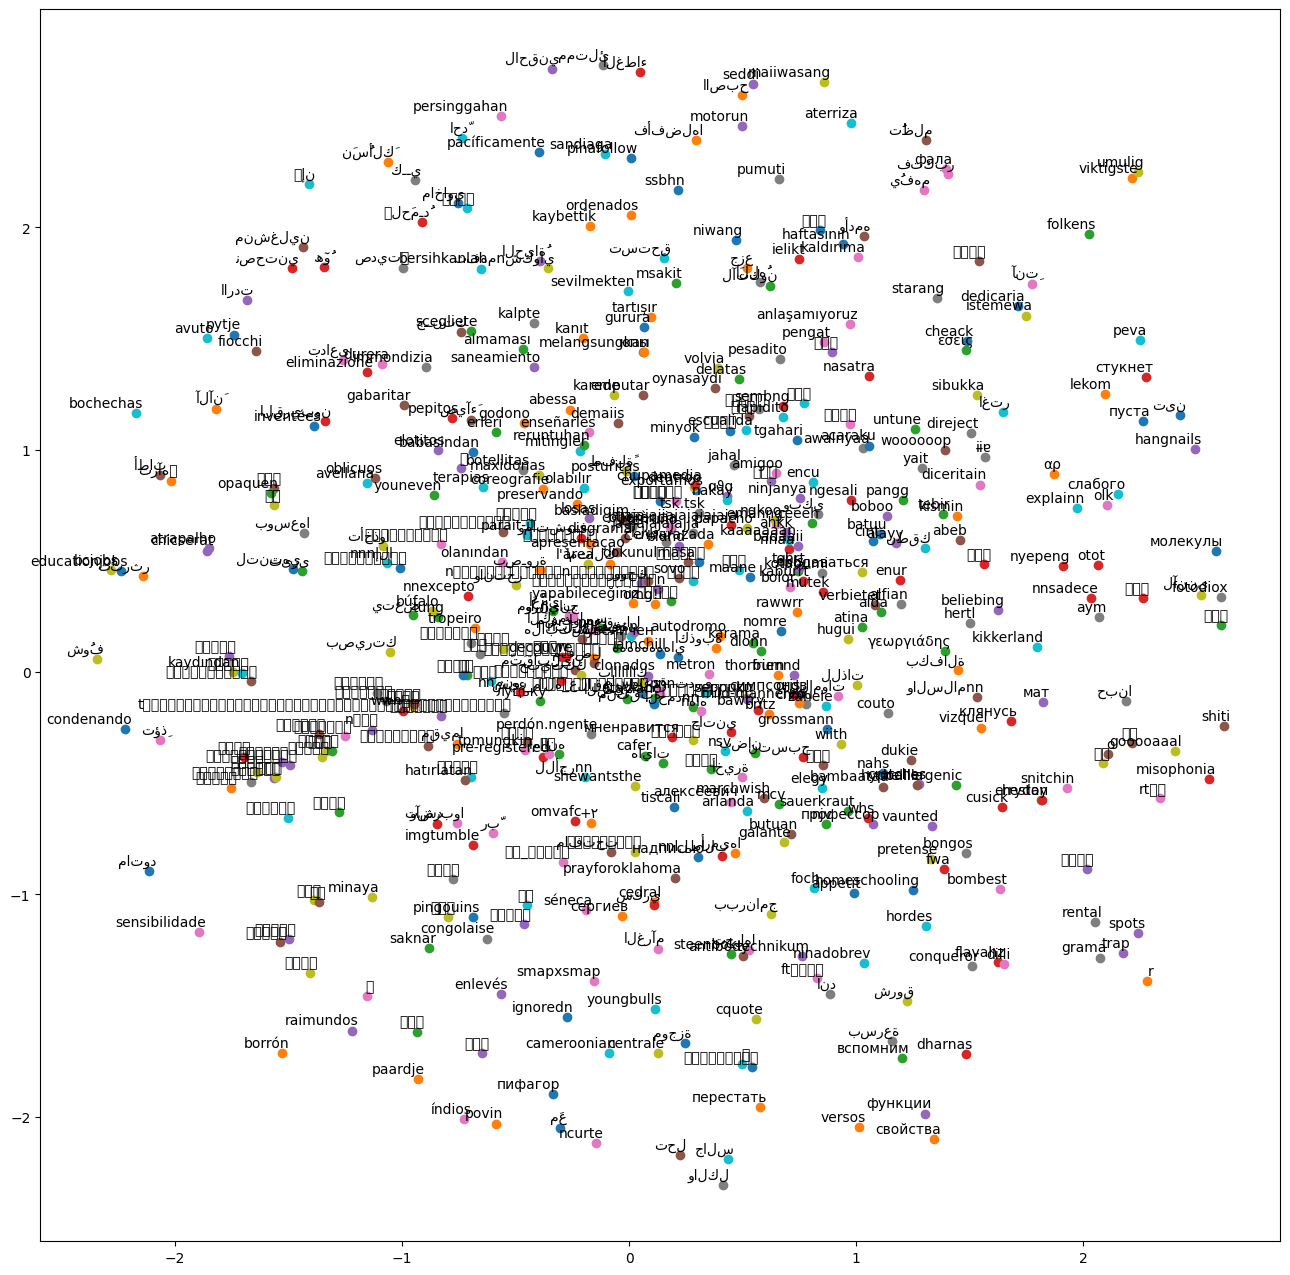

In [15]:
tsne_plot(model)